# Proyecto 03 - Procesamiento del Lenguaje Natural

## Dataset: The Multilingual Amazon Reviews Corpus

**Recuerda descargar el dataset de [aquí](https://github.com/kang205/SASRec). Es un archivo .zip que contiene tres documentos. Más información sobre el dataset [aquí](https://registry.opendata.aws/amazon-reviews-ml/). Es importante que tengas en cuenta la [licencia](https://docs.opendata.aws/amazon-reviews-ml/license.txt) de este dataset.**

### Exploración de datos y Procesamiento del Lenguaje Natural

Dedícale un buen tiempo a hacer un Análisis Exploratorio de Datos. Considera que hasta que no hayas aplicado las herramientas de Procesamiento del Lenguaje Natural vistas, será difícil completar este análisis. Elige preguntas que creas que puedas responder con este dataset. Por ejemplo, ¿qué palabras están asociadas a calificaciones positivas y qué palabras a calificaciones negativas?

### Machine Learning

Implementa un modelo que, dada la crítica de un producto, asigne la cantidad de estrellas correspondiente. **Para pensar**: ¿es un problema de Clasificación o de Regresión?

1. Haz todas las transformaciones de datos que consideres necesarias. Justifica.
1. Evalúa de forma apropiada sus resultados. Justifica la métrica elegida.
1. Elige un modelo benchmark y compara tus resultados con este modelo.
1. Optimiza los hiperparámetros de tu modelo.
1. Intenta responder la pregunta: ¿Qué información está usando el modelo para predecir?

**Recomendación:** si no te resulta conveniente trabajar en español con NLTK, te recomendamos que explores la librería [spaCy](https://spacy.io/).

### Para pensar, investigar y, opcionalmente, implementar
1. ¿Valdrá la pena convertir el problema de Machine Learning en un problema binario? Es decir, asignar únicamente las etiquetas Positiva y Negativa a cada crítica y hacer un modelo que, en lugar de predecir las estrellas, prediga esa etiqueta. Pensar en qué situación puede ser útil. ¿Esperas que el desempeño sea mejor o peor?
1. ¿Hay algo que te gustaría investigar o probar?


--------------------------✨INICIO DE PROYECTO 3✨----------------------------


 **Importación de librerias**

In [2]:
import itertools

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import nltk #es una popular librería de Python que se utiliza para NLP.

#Esto sirve para configurar NLTK. La primera vez puede tardar un poco
nltk.download('punkt')
nltk.download('stopwords')

from wordcloud import WordCloud #esto es para la nube de palabras

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\romil\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\romil\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
#Importación de los stopwords del español e impresión
stopwords = nltk.corpus.stopwords
stopwords = stopwords.words('spanish')
#stopwords  impresión

# 1.1.1  Exploración de datos y Procesamiento del Lenguaje Natural

## <font color=purple>  Importacion de datos 

In [4]:
dataset = pd.read_json('datos\dataset_es_dev.json', lines=True)
dataset2 = pd.read_json('datos\dataset_es_test.json', lines=True)
dataset3 = pd.read_json('datos\dataset_es_train.json', lines=True)

Vista de los primeros 5 regitros de cada dataset

In [5]:
print ("Archico dev:")
dataset.head()

Archico dev:


,review_id,product_id,reviewer_id,stars,review_body,review_title,language,product_category
0,es_0417480,product_es_0873923,reviewer_es_0672978,1,"Malisimo, muy grande demasiado aparatoso y mal...",Mala compra,es,wireless
1,es_0180432,product_es_0713146,reviewer_es_0100858,1,No he recibido el pedido no la devolución,No lo he recibido,es,apparel
2,es_0144850,product_es_0356874,reviewer_es_0486447,1,"Tengo que buscar otro sistema, este no funcion...",Que no aprieta bien en el manillar,es,sports
3,es_0339629,product_es_0939832,reviewer_es_0894703,1,Utilicé las brocas de menor diámetro y se me d...,Brocas de mantequilla,es,home_improvement
4,es_0858362,product_es_0489066,reviewer_es_0887663,1,No me gusta su olor a viejo y aspecto malo,No me gusta,es,beauty


In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   review_id         5000 non-null   object
 1   product_id        5000 non-null   object
 2   reviewer_id       5000 non-null   object
 3   stars             5000 non-null   int64 
 4   review_body       5000 non-null   object
 5   review_title      5000 non-null   object
 6   language          5000 non-null   object
 7   product_category  5000 non-null   object
dtypes: int64(1), object(7)
memory usage: 312.6+ KB


In [7]:
print("Archico test:")
dataset.head()

Archico test:


,review_id,product_id,reviewer_id,stars,review_body,review_title,language,product_category
0,es_0417480,product_es_0873923,reviewer_es_0672978,1,"Malisimo, muy grande demasiado aparatoso y mal...",Mala compra,es,wireless
1,es_0180432,product_es_0713146,reviewer_es_0100858,1,No he recibido el pedido no la devolución,No lo he recibido,es,apparel
2,es_0144850,product_es_0356874,reviewer_es_0486447,1,"Tengo que buscar otro sistema, este no funcion...",Que no aprieta bien en el manillar,es,sports
3,es_0339629,product_es_0939832,reviewer_es_0894703,1,Utilicé las brocas de menor diámetro y se me d...,Brocas de mantequilla,es,home_improvement
4,es_0858362,product_es_0489066,reviewer_es_0887663,1,No me gusta su olor a viejo y aspecto malo,No me gusta,es,beauty


In [8]:
dataset2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   review_id         5000 non-null   object
 1   product_id        5000 non-null   object
 2   reviewer_id       5000 non-null   object
 3   stars             5000 non-null   int64 
 4   review_body       5000 non-null   object
 5   review_title      5000 non-null   object
 6   language          5000 non-null   object
 7   product_category  5000 non-null   object
dtypes: int64(1), object(7)
memory usage: 312.6+ KB


In [9]:
print ("Archico train:")
dataset3.head()

Archico train:


,review_id,product_id,reviewer_id,stars,review_body,review_title,language,product_category
0,es_0491108,product_es_0296024,reviewer_es_0999081,1,Nada bueno se me fue ka pantalla en menos de 8...,television Nevir,es,electronics
1,es_0869872,product_es_0922286,reviewer_es_0216771,1,"Horrible, nos tuvimos que comprar otro porque ...",Dinero tirado a la basura con esta compra,es,electronics
2,es_0811721,product_es_0474543,reviewer_es_0929213,1,Te obligan a comprar dos unidades y te llega s...,solo llega una unidad cuando te obligan a comp...,es,drugstore
3,es_0359921,product_es_0656090,reviewer_es_0224702,1,"No entro en descalificar al vendedor, solo pue...",PRODUCTO NO RECIBIDO.,es,wireless
4,es_0068940,product_es_0662544,reviewer_es_0224827,1,Llega tarde y co la talla equivocada,Devuelto,es,shoes


In [9]:
dataset3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   review_id         200000 non-null  object
 1   product_id        200000 non-null  object
 2   reviewer_id       200000 non-null  object
 3   stars             200000 non-null  int64 
 4   review_body       200000 non-null  object
 5   review_title      200000 non-null  object
 6   language          200000 non-null  object
 7   product_category  200000 non-null  object
dtypes: int64(1), object(7)
memory usage: 12.2+ MB


Dimensiones de archivos Test and Train

In [10]:
dataset2.shape, dataset3.shape

((5000, 8), (200000, 8))

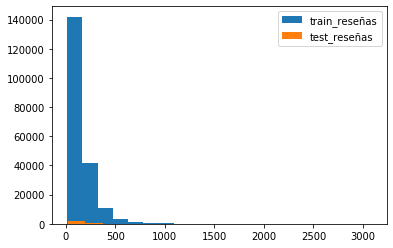

In [12]:
length_train = dataset3['review_body'].str.len()
length_test = dataset2['review_body'].str.len()

plt.hist(length_train, bins=20, label="train_reseñas")
plt.hist(length_test, bins=20, label="test_reseñas")
plt.legend()
plt.show()

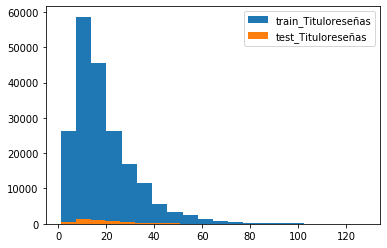

In [13]:
length_train = dataset3['review_title'].str.len()
length_test = dataset2['review_title'].str.len()

plt.hist(length_train, bins=20, label="train_Tituloreseñas")
plt.hist(length_test, bins=20, label="test_Tituloreseñas")
plt.legend()
plt.show()

Luego de ver la mayor cantidad de registros en el dataset3 voy a trabajar con ese para la exploración de los datos

In [38]:
#creo nueva columna con la longitud del cuerpo de la reseña
dataset3['text length'] = dataset3['review_body'].apply(len)
#creo nueva columna con la longitud del título
dataset3['text length2'] = dataset3['review_title'].apply(len)

Visualización de longitud de texto por estrellas


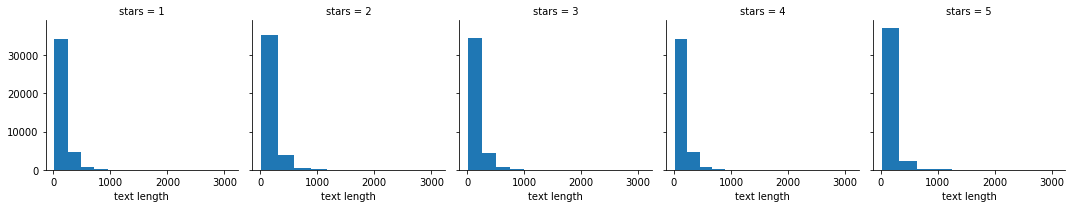

In [11]:
print("Visualización de longitud de texto por estrellas del cuerpo de reseñas")
g = sns.FacetGrid(dataset3,col='stars')
g.map(plt.hist,'text length')

Visualización de longitud de texto por estrellas del título de reseñas


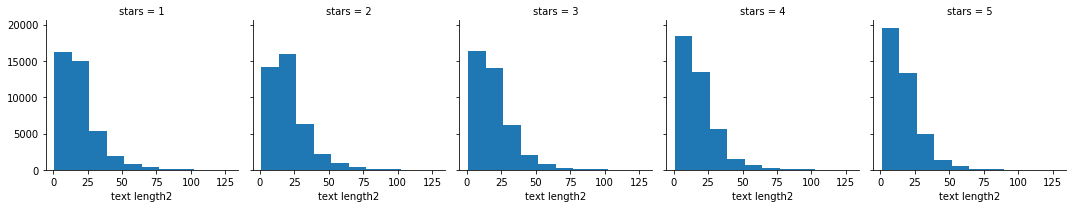

In [39]:
print("Visualización de longitud de texto por estrellas del título de reseñas")
g = sns.FacetGrid(dataset3,col='stars')
g.map(plt.hist,'text length2')

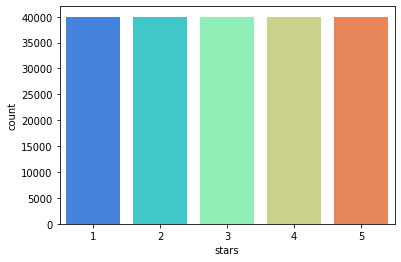

In [11]:
#cantidad de registros por estrellas
sns.countplot(x='stars',data=dataset3,palette='rainbow')

In [12]:
#Promedio de longitud de texto agrupados por estrellas
dataset3.groupby('stars').mean()


,text length
stars,
1,152.883475
2,168.438750
3,155.380300
4,142.357200
5,137.454825


In [13]:
#convierto las palabras a minúsculas
dataset3=dataset3.apply(lambda x: x.str.lower() if x.dtype == "object" else x)  

## <font color=purple> Palabras asociadas a calificaciones positivas

In [14]:
#se crea un dataset con los registros de mayor estrella 
dataset3_mayorEstrella = dataset3[dataset3.stars==5]
dataset3_mayorEstrella.head()

,review_id,product_id,reviewer_id,stars,review_body,review_title,language,product_category,text length
160000,es_0910973,product_es_0134206,reviewer_es_0167400,5,es muy práctico para cuando me voy de vacacion...,muy útil,es,lawn_and_garden,249
160001,es_0188101,product_es_0588074,reviewer_es_0222694,5,cumple su función calidad precio bien. buen ma...,luz ultravioleta en led bien diseñada,es,home,76
160002,es_0578692,product_es_0623782,reviewer_es_0300882,5,perfecto.. es lo que buscaba,perfecto,es,wireless,28
160003,es_0795859,product_es_0754167,reviewer_es_0233707,5,"muy buena relación calidad-precio, es silencio...",muy buena destructora,es,office_product,82
160004,es_0920314,product_es_0400256,reviewer_es_0383766,5,"a mi hija le encanta, aunque hubiera preferido...",muy bueno,es,toy,106


In [15]:
# Se carga en listas las palabras normalizadas
todas_reseñas_mayorestrella = []
todos_titulos_mayorestrella = []
for i in range(dataset3_mayorEstrella.shape[0]):
    # Se selecciona el cuerpo de la reseña
    reseña = dataset3_mayorEstrella.iloc[i].review_body
    # pasar de un único string de texto a una lista de strings de oraciones.
    reseña = nltk.tokenize.RegexpTokenizer("[\w]+").tokenize(reseña)
    # Eliminamos las palabras de menos de 3 letras
    reseña = [palabra for palabra in reseña if len(palabra) > 3]
    # se saca las stopwords
    reseña = [word for word in reseña if word not in stopwords]

    # Se selecciona el cuerpo de la reseña
    titulo = dataset3_mayorEstrella.iloc[i].review_title
    # pasar de un único string de texto a una lista de strings de oraciones.
    titulo = nltk.tokenize.RegexpTokenizer("[\w]+").tokenize(titulo)
    # Eliminamos las palabras de menos de 3 letras
    titulo = [palabra for palabra in titulo if len(palabra) > 3]
    # se saca las stopwords
    titulo = [word for word in titulo if word not in stopwords]

    todos_titulos_mayorestrella.append(titulo)
    todas_reseñas_mayorestrella.append(reseña)

In [16]:
# Esta celda convierte una lista de listas en una unica lista para el cuerpo de las reseñas
todas_reseñas_mayorestrella = list(itertools.chain(*todas_reseñas_mayorestrella))
todas_reseñas_mayorestrella


['práctico',
 'voy',
 'vacaciones',
 'preocupar',
 'si',
 'seguirán',
 'vivas',
 'plantas',
 'vuelva',
 'montaje',
 'sencillo',
 'puede',
 'regular',
 'salida',
 'agua',
 'caiga',
 'gota',
 'cada',
 'cierto',
 'tiempo',
 'recomiendo',
 'cumple',
 'función',
 'calidad',
 'precio',
 'bien',
 'buen',
 'material',
 'agradable',
 'vista',
 'perfecto',
 'buscaba',
 'buena',
 'relación',
 'calidad',
 'precio',
 'silenciosa',
 'cumple',
 'publicitado',
 'hija',
 'encanta',
 'aunque',
 'preferido',
 'plástico',
 'mas',
 'gomoso',
 'mas',
 'fuerte',
 'duradero',
 'buen',
 'producto',
 'recomiendo',
 'pequeños',
 'rasguños',
 'coche',
 'útil',
 'gatas',
 'usan',
 'acorde',
 'esperaba',
 'buena',
 'calidad',
 'precio',
 'durabilidad',
 'usos',
 'dando',
 'recomiendo',
 'encanta',
 'historia',
 'bonita',
 'esperando',
 'salga',
 'segunda',
 'parte',
 'set',
 'completo',
 'comida',
 'juguete',
 'perfecta',
 'complementar',
 'cualquier',
 'cocinita',
 'fantástico',
 'rodillo',
 'hace',
 'ruido',
 'go

In [17]:
# Esta celda convierte una lista de listas en una unica lista para el titulo de las reseñas
todos_titulos_mayorestrella = list(itertools.chain(*todos_titulos_mayorestrella))
todos_titulos_mayorestrella

['útil',
 'luz',
 'ultravioleta',
 'led',
 'bien',
 'diseñada',
 'perfecto',
 'buena',
 'destructora',
 'bueno',
 'bote',
 'spray',
 'utilisimo',
 'buena',
 'calidad',
 'precio',
 'entretenida',
 'calidad',
 'belleza',
 'alcance',
 'siempre',
 'talla',
 'menos',
 'crear',
 'nuevos',
 'lectores',
 'encantan',
 'súper',
 'chula',
 'yoly',
 'estupendo',
 'encantadas',
 'producto',
 'útil',
 'buena',
 'calidad',
 'gran',
 'regalo',
 'masa',
 'brillante',
 'útil',
 'imagen',
 'buen',
 'aceite',
 'genial',
 'buen',
 'producto',
 'servicio',
 'impecable',
 'bonita',
 'práctica',
 'excelente',
 'cable',
 'genial',
 'súper',
 'cómoda',
 'manejable',
 'beatriz',
 'cálidad',
 'precio',
 'inmejorable',
 'buenas',
 'versatilidad',
 'super',
 'bien',
 'cliente',
 'amazon',
 'buen',
 'regalo',
 'buena',
 'potencia',
 'lucinda',
 'conexión',
 '5',
 'ghz',
 'perfecta',
 'recomendado',
 '100',
 'perfecto',
 'fenomenal',
 'rapidez',
 'idoneidad',
 'excelente',
 'batería',
 'día',
 'buena',
 'relacion',
 

In [18]:
#FreqDist para las frecuencias de las palabras del cuerpo de las reseñas
freq_reseñas_mayorestrella = nltk.FreqDist(todas_reseñas_mayorestrella)
freq_reseñas_mayorestrella 

FreqDist({'bien': 9333, 'calidad': 8263, 'buena': 6852, 'precio': 5813, 'perfecto': 4809, 'producto': 4459, 'buen': 4107, 'compra': 2827, 'perfectamente': 2778, 'si': 2773, ...})

In [19]:
#FreqDist para las frecuencias de las palabras del titulo de las reseñas
freq_titulos_mayorestrella = nltk.FreqDist(todos_titulos_mayorestrella)
freq_titulos_mayorestrella 

FreqDist({'calidad': 3877, 'buena': 3702, 'perfecto': 2887, 'buen': 2716, 'precio': 2400, 'bien': 1955, 'producto': 1835, 'compra': 1383, 'genial': 1264, 'excelente': 1072, ...})

In [20]:
#frecuencia de palabras del cuerpo de reseñas
df3_mayorEstrella = pd.DataFrame(freq_reseñas_mayorestrella.items(),columns=['word','Frequency'])
# ordenar por frecuencia
df3_mayorEstrella.sort_values('Frequency',inplace=True,ascending=False)
df3_mayorEstrella.head()

,word,Frequency
25,bien,9333
23,calidad,8263
32,buena,6852
24,precio,5813
30,perfecto,4809


In [21]:
#frecuencia de palabras del titulo de reseñas
df3_mayorEstrellatitulo = pd.DataFrame(freq_titulos_mayorestrella.items(),columns=['word','Frequency'])
# ordenar por frecuencia
df3_mayorEstrellatitulo.sort_values('Frequency',inplace=True,ascending=False)
df3_mayorEstrellatitulo.head()

,word,Frequency
13,calidad,3877
7,buena,3702
6,perfecto,2887
36,buen,2716
14,precio,2400


Visualización de las palabras con sus frecuencias

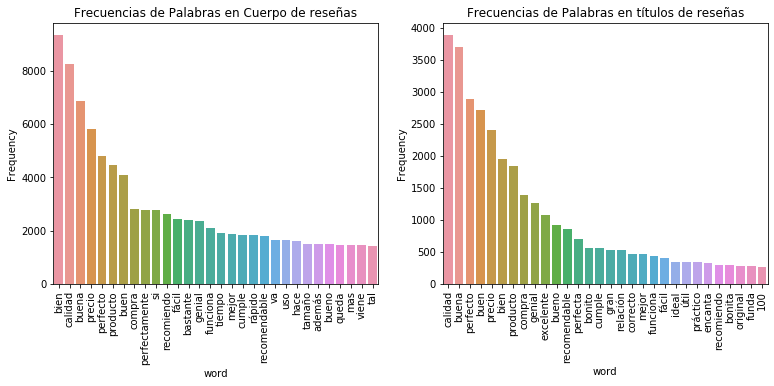

In [22]:
plt.figure(figsize = (6.4*2,4.8))
plt.subplot(1,2,1)
sns.barplot(x=df3_mayorEstrella.iloc[:30].word,
            y=df3_mayorEstrella.iloc[:30].Frequency )

plt.xticks(rotation=90)
plt.title("Frecuencias de Palabras en Cuerpo de reseñas")

plt.subplot(1,2,2)
sns.barplot(x=df3_mayorEstrellatitulo.iloc[:30].word,
            y=df3_mayorEstrellatitulo.iloc[:30].Frequency)

plt.xticks(rotation=90)
plt.title("Frecuencias de Palabras en títulos de reseñas")
plt.show()

visualización de la nube de palabras para las reseñas con mayor estrella

(-0.5, 799.5, 499.5, -0.5)

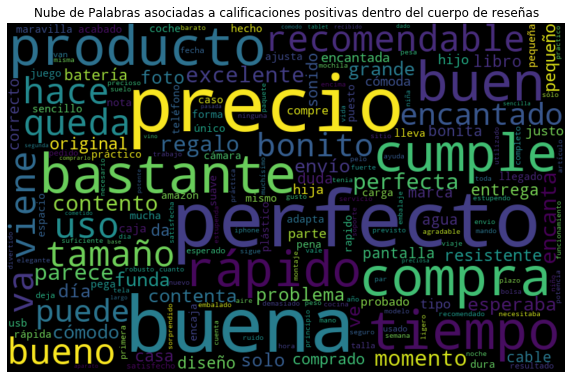

In [23]:
# palapras de cuerpo de reseñas
all_words = ' '.join([text for text in df3_mayorEstrella['word']])
wordcloud = WordCloud(width=800, height=500, random_state=21,
                      max_font_size=110).generate(all_words)


plt.figure(figsize=(10, 7))
plt.title("Nube de Palabras asociadas a calificaciones positivas dentro del cuerpo de reseñas" )
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')

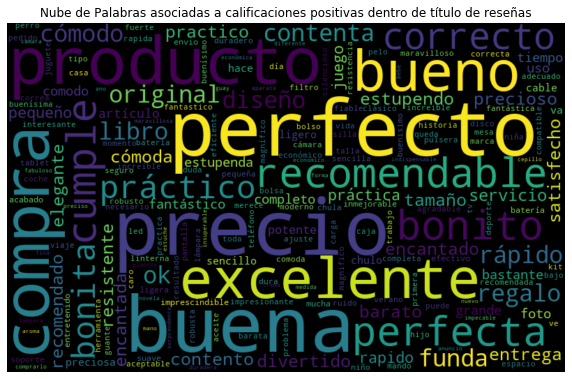

In [24]:
# palapras de título de reseñas
all_words2 = ' '.join([text for text in df3_mayorEstrellatitulo['word']])
wordcloud2 = WordCloud(width=800, height=500, random_state=21,
                       max_font_size=110).generate(all_words2)
plt.figure(figsize=(10, 7))
plt.title("Nube de Palabras asociadas a calificaciones positivas dentro de título de reseñas")
plt.imshow(wordcloud2, interpolation="bilinear")
plt.axis('off')

plt.show()

## <font color=purple> Palabras asociadas a calificaciones Negativas

In [25]:
#se crea un dataset con los registros de mayor menor estrella 
dataset3_menorEstrella = dataset3[dataset3.stars==1]
dataset3_menorEstrella.head()

,review_id,product_id,reviewer_id,stars,review_body,review_title,language,product_category,text length
0,es_0491108,product_es_0296024,reviewer_es_0999081,1,nada bueno se me fue ka pantalla en menos de 8...,television nevir,es,electronics,94
1,es_0869872,product_es_0922286,reviewer_es_0216771,1,"horrible, nos tuvimos que comprar otro porque ...",dinero tirado a la basura con esta compra,es,electronics,140
2,es_0811721,product_es_0474543,reviewer_es_0929213,1,te obligan a comprar dos unidades y te llega s...,solo llega una unidad cuando te obligan a comp...,es,drugstore,117
3,es_0359921,product_es_0656090,reviewer_es_0224702,1,"no entro en descalificar al vendedor, solo pue...",producto no recibido.,es,wireless,332
4,es_0068940,product_es_0662544,reviewer_es_0224827,1,llega tarde y co la talla equivocada,devuelto,es,shoes,36


In [26]:
#Se carga en listas las palabras normalizadas
todas_reseñas_menorEstrella = [] #esta lista será para las palabras que se encuentran en el cuerpo de las reseñas
todos_titulos_menorEstrella = [] #esta lista será para las palabras que se encuentran en el título
for i in range(dataset3_menorEstrella.shape[0]):
    reseña = dataset3_menorEstrella.iloc[i].review_body #Se selecciona el cuerpo de la reseña
    reseña = nltk.tokenize.RegexpTokenizer("[\w]+").tokenize(reseña) #pasar de un único string de texto a una lista de strings de oraciones.    
    reseña = [palabra for palabra in reseña if len(palabra)>3]  # Eliminamos las palabras de menos de 3 letras
    reseña = [word for word in reseña if word not in stopwords] #se saca las stopwords

    titulo = dataset3_menorEstrella.iloc[i].review_title #Se selecciona el cuerpo de la reseña
    titulo = nltk.tokenize.RegexpTokenizer("[\w]+").tokenize(titulo) #pasar de un único string de texto a una lista de strings de oraciones.
    titulo = [palabra for palabra in titulo if len(palabra)>3] # Eliminamos las palabras de menos de 3 letras
    titulo = [word for word in titulo if word not in stopwords] #se saca las stopwords
    
    todos_titulos_menorEstrella.append(titulo)
    todas_reseñas_menorEstrella.append(reseña)

In [27]:
# Esta celda convierte una lista de listas en una unica lista para el cuerpo de las reseñas
todas_reseñas_menorEstrella = list(itertools.chain(*todas_reseñas_menorEstrella))
todas_reseñas_menorEstrella

['bueno',
 'ka',
 'pantalla',
 'menos',
 '8',
 'meses',
 'recibido',
 'respuesta',
 'fabricante',
 'horrible',
 'comprar',
 'sabemos',
 'inglés',
 'informático',
 'después',
 'hora',
 'capaz',
 'instalarlo',
 'obligan',
 'comprar',
 'dos',
 'unidades',
 'llega',
 'solo',
 'forma',
 'reclamar',
 'autentica',
 'estafa',
 'compreis',
 'entro',
 'descalificar',
 'vendedor',
 'solo',
 'puedo',
 'decir',
 'tras',
 'dos',
 'meses',
 'espera',
 'sigo',
 'producto',
 'contactar',
 'amazon',
 'reclamar',
 'reembolso',
 'amazon',
 '10',
 'hace',
 'cargo',
 'problema',
 'desembolsado',
 'dinero',
 'dos',
 'meses',
 'devuelven',
 'perdida',
 'tiempo',
 'total',
 'palabras',
 'ustedes',
 'deciden',
 'llega',
 'tarde',
 'co',
 'talla',
 'equivocada',
 'jamás',
 'llegó',
 'vendedor',
 'nunca',
 'contacto',
 'conmigo',
 'pesar',
 'intentarlo',
 '2',
 'veces',
 'paraguas',
 'mala',
 'calidad',
 'da',
 'sensación',
 'va',
 'romper',
 'abres',
 'cutre',
 'devolverla',
 'ser',
 'triangular',
 'agarra',
 'f

In [28]:
# Esta celda convierte una lista de listas en una unica lista para el titulo de las reseñas
todos_titulos_menorEstrella = list(itertools.chain(*todos_titulos_menorEstrella))
todos_titulos_menorEstrella

['television',
 'nevir',
 'dinero',
 'tirado',
 'basura',
 'compra',
 'solo',
 'llega',
 'unidad',
 'obligan',
 'comprar',
 'dos',
 'producto',
 'recibido',
 'devuelto',
 'jamás',
 'llegó',
 'horroroso',
 'funcional',
 'llego',
 'mala',
 'calidad',
 'defectuoso',
 'mala',
 'descripción',
 'saltan',
 'plomos',
 'utilizarla',
 'pegamento',
 'pesimo',
 'mariposa',
 'retuerce',
 'roto',
 'recomendable',
 'ojalá',
 'acuerden',
 'demasiado',
 'fragil',
 'cristina',
 'avería',
 'segundo',
 'día',
 'parece',
 'buena',
 'calidad',
 'información',
 'internet',
 'despues',
 '2',
 'meses',
 'apenas',
 'uso',
 'hundiendo',
 'material',
 'malo',
 'llego',
 'nunca',
 'dejado',
 'funcionar',
 'descontento',
 'mal',
 'pilar',
 'cápsulas',
 'reutilizables',
 'inútiles',
 'inútil',
 'estafa',
 'suponía',
 'producto',
 'prime',
 'merece',
 'pena',
 'llegado',
 'todavía',
 'llegado',
 'bajisima',
 'calidad',
 'grill',
 'malo',
 'agujero',
 'rellenar',
 'piñata',
 'fatal',
 'envío',
 'peores',
 'protectores

In [29]:
#FreqDist para las frecuencias de las palabras del cuerpo de las reseñas
freq_reseñas_menorEstrella = nltk.FreqDist(todas_reseñas_menorEstrella)
freq_reseñas_menorEstrella 

FreqDist({'producto': 7219, 'si': 4653, 'bien': 4448, 'calidad': 4349, 'llegado': 3422, 'dos': 3328, 'mal': 2868, 'recomiendo': 2812, 'amazon': 2749, 'mala': 2587, ...})

In [32]:
#FreqDist para las frecuencias de las palabras del titulo de las reseñas
freq_titulos_menorEstrella = nltk.FreqDist(todos_titulos_menorEstrella)
freq_titulos_menorEstrella 

FreqDist({'calidad': 2420, 'mala': 2216, 'producto': 1799, 'mal': 1702, 'funciona': 1254, 'malo': 847, 'llegado': 817, 'recomiendo': 706, 'recibido': 673, 'nunca': 613, ...})

In [33]:
#frecuencia de palabras del cuerpo de reseñas
df3_menorEstrella = pd.DataFrame(freq_reseñas_menorEstrella.items(),columns=['word','Frequency'])
# ordenar por frecuencia
df3_menorEstrella.sort_values('Frequency',inplace=True,ascending=False)
df3_menorEstrella.head()

,word,Frequency
36,producto,7219
175,si,4653
98,bien,4448
68,calidad,4349
325,llegado,3422


In [34]:
#frecuencia de palabras del titulo de reseñas
df3_menorEstrellatitulo = pd.DataFrame(freq_titulos_menorEstrella.items(),columns=['word','Frequency'])
# ordenar por frecuencia
df3_menorEstrellatitulo.sort_values('Frequency',inplace=True,ascending=False)
df3_menorEstrellatitulo.head()

,word,Frequency
21,calidad,2420
20,mala,2216
12,producto,1799
57,mal,1702
162,funciona,1254


Visualización de las palabras con sus frecuencias

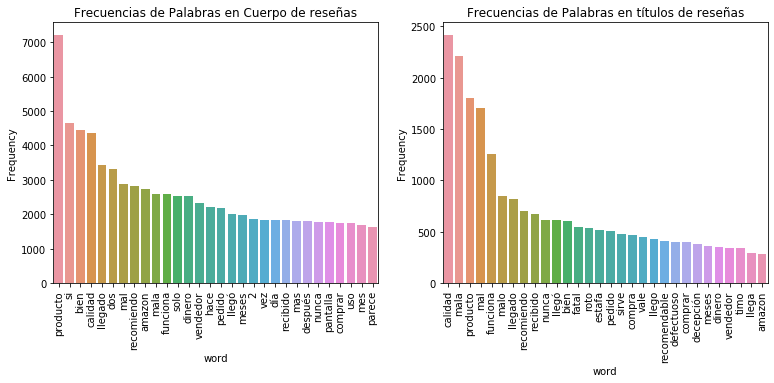

In [35]:
plt.figure(figsize = (6.4*2,4.8))
plt.subplot(1,2,1)
sns.barplot(x=df3_menorEstrella.iloc[:30].word,
            y=df3_menorEstrella.iloc[:30].Frequency )

plt.xticks(rotation=90)
plt.title("Frecuencias de Palabras en Cuerpo de reseñas")

plt.subplot(1,2,2)
sns.barplot(x=df3_menorEstrellatitulo.iloc[:30].word,
            y=df3_menorEstrellatitulo.iloc[:30].Frequency)

plt.xticks(rotation=90)
plt.title("Frecuencias de Palabras en títulos de reseñas")
plt.show()

Visualización de Nube de Palabras

(-0.5, 799.5, 499.5, -0.5)

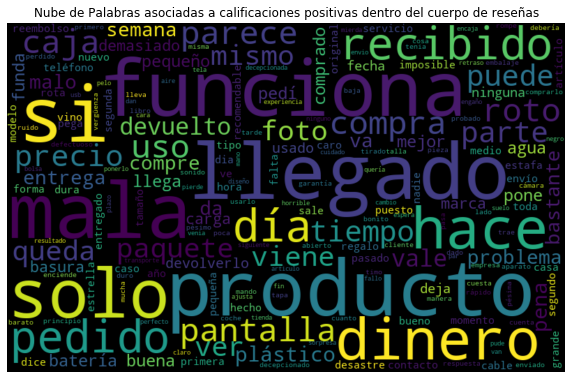

In [36]:
# palapras de cuerpo de reseñas
all_words = ' '.join([text for text in df3_menorEstrella['word']])
wordcloud = WordCloud(width=800, height=500, random_state=21,
                      max_font_size=110).generate(all_words)


plt.figure(figsize=(10, 7))
plt.title("Nube de Palabras asociadas a calificaciones positivas dentro del cuerpo de reseñas" )
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')

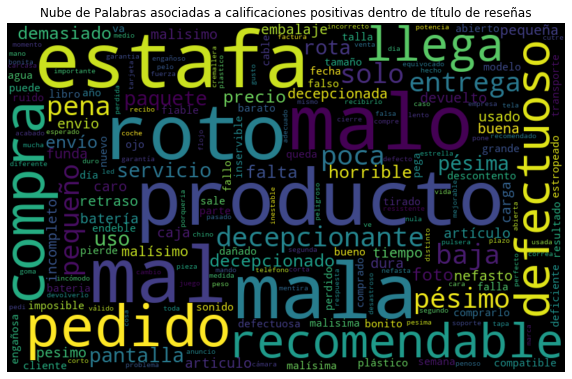

In [37]:
# palapras de título de reseñas
all_words2 = ' '.join([text for text in df3_menorEstrellatitulo['word']])
wordcloud2 = WordCloud(width=800, height=500, random_state=21,
                       max_font_size=110).generate(all_words2)
plt.figure(figsize=(10, 7))
plt.title("Nube de Palabras asociadas a calificaciones positivas dentro de título de reseñas")
plt.imshow(wordcloud2, interpolation="bilinear")
plt.axis('off')

plt.show()

## <font color=purple> Análisis de todas las Palabras del título con sus estrella correspondiente

In [ ]:
# Se carga en listas las palabras normalizadas
todas_reseñas_mayorestrella = []
todos_titulos_mayorestrella = []
for i in range(dataset3_mayorEstrella.shape[0]):
    # Se selecciona el cuerpo de la reseña
    reseña = dataset3_mayorEstrella.iloc[i].review_body
    # pasar de un único string de texto a una lista de strings de oraciones.
    reseña = nltk.tokenize.RegexpTokenizer("[\w]+").tokenize(reseña)
    # Eliminamos las palabras de menos de 3 letras
    reseña = [palabra for palabra in reseña if len(palabra) > 3]
    # se saca las stopwords
    reseña = [word for word in reseña if word not in stopwords]

    # Se selecciona el cuerpo de la reseña
    titulo = dataset3_mayorEstrella.iloc[i].review_title
    # pasar de un único string de texto a una lista de strings de oraciones.
    titulo = nltk.tokenize.RegexpTokenizer("[\w]+").tokenize(titulo)
    titulo = [palabra for palabra in titulo if len(palabra)>3] # Eliminamos las palabras de menos de 3 letras
    # se saca las stopwords
    titulo = [word for word in titulo if word not in stopwords]

    todos_titulos_mayorestrella.append(titulo)
    todas_reseñas_mayorestrella.append(reseña)